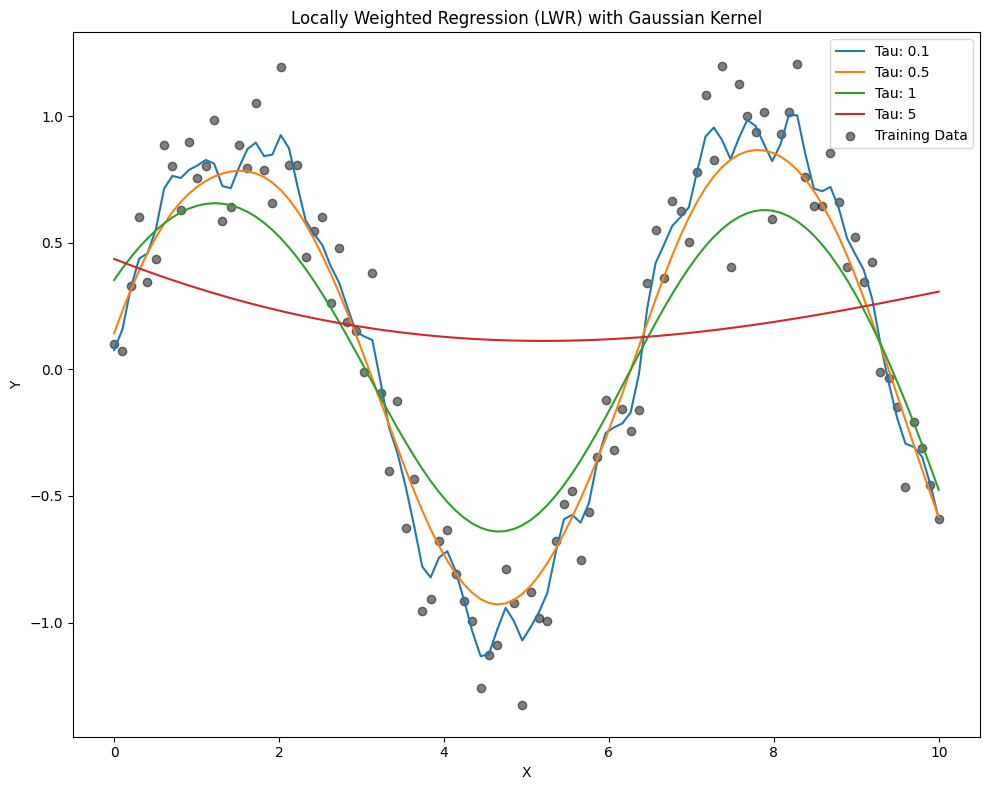

In [1]:
#Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs. 

import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(x, x_query, tau):
    return np.exp(-np.square(x - x_query) / (2 * tau ** 2))

def lwr(x_train, y_train, x_query, tau):
    m = len(x_train)
    W = np.diag(gaussian_kernel(x_train, x_query, tau))
    X_bias = np.c_[np.ones(m), x_train]
    theta = np.linalg.pinv(X_bias.T @ W @ X_bias) @ (X_bias.T @ W @ y_train)
    return np.array([1, x_query]) @ theta

np.random.seed(42)
x_train = np.linspace(0, 10, 100)
y_train = np.sin(x_train) + np.random.normal(0, 0.2, 100)

tau_values = [0.1, 0.5, 1, 5]
x_test = np.linspace(0, 10, 100)

plt.figure(figsize=(10, 8))
for tau in tau_values:
    y_pred = np.array([lwr(x_train, y_train, xq, tau) for xq in x_test])
    plt.plot(x_test, y_pred, label=f"Tau: {tau}")

plt.scatter(x_train, y_train, color='black', label='Training Data', alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Locally Weighted Regression (LWR) with Gaussian Kernel")
plt.legend()
plt.tight_layout()
plt.show()